In [1]:
import os
import numpy as np
import pandas as pd
import skimage as sk
from skimage import io
from scipy import stats
import matplotlib.pyplot as plt
from scipy import stats
from pyLineage.lineageIO.atpCalib import atpCalib
import pyLineage as myPackage
%matplotlib inline

In [2]:
def isStr(data = None):
    if isinstance(data, str) or isinstance(data, unicode):
        return True
    else:
        return False

In [3]:
def listDirWithoutHidden(path):
    listDir = list()
    for file in os.listdir(path):
        if not file.startswith('.'):
            listDir.append(file)
    return listDir

In [4]:
dataPath = os.path.join(os.path.dirname(myPackage.__file__),'Data','CalibCurve',"CalibCurve0821")
concList = [0, 1, 2, 3, 4, 5, 6, 7]
# concList = [0, 0.02, 0.2, 0.5, 1, 2, 3, 4]
meanList = list()
sdList = list()
for conc in concList:
    if conc != 'ctrl' and conc != '6':
        tmpDf = pd.read_csv(os.path.join(dataPath, str(conc), 'Res.csv'))
        meanList.append(np.mean(tmpDf['Mean']))
        sdList.append(np.std(tmpDf['Mean']))

In [5]:
# Hill Parms

Emax = 4.9474
EC50 = 5.8325
HillCo = 2
d = 0.6521

In [6]:
y = np.arange(d,4,0.01,np.float)
x = list()
for val in y:
    atpval = atpCalib(val) # Plot to parms
    x.append(atpval)

/opt/local/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


# Regression

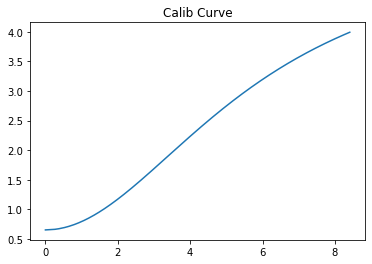

In [7]:
plt.title('Calib Curve')
plt.plot(x,y)

Text(0, 0.5, 'Ratio(405ex/488ex)')

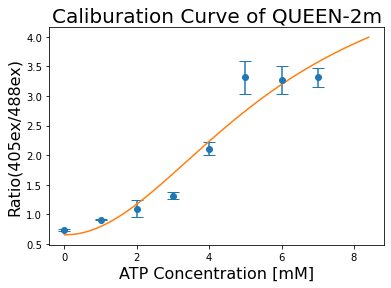

In [8]:
plt.errorbar(concList, meanList, yerr = sdList, fmt = 'o', capsize = 6, label = '30')
#plt.plot(concList, pc[0] * np.array(concList) + pc[1])
plt.plot(x,y)
plt.title('Caliburation Curve of QUEEN-2m', fontsize=20)
plt.xlabel('ATP Concentration [mM]', fontsize=16)
plt.ylabel('Ratio(405ex/488ex)', fontsize=16)